In [2]:
from utils import Neuron, Dataset, Layer, MLP, sigmoid, d_sigmoid
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
def feedforward(self):
    res = 0.
    for i in range(len(self.inputs)):
        res += self.weights[i]*(self.inputs[i])
    res += self.bias
    self.u = res
    self.out = sigmoid(res)

Neuron.feedforward = feedforward

A network description file has to be provided. This is a text file which contains information about the number of layers in the network and the number of units (neuron) for each layer. Here is an example of such a file: 
NeuralNetParameters.dat

In [4]:
training_data_df = pd.read_csv('Music_data_set_binary.csv').drop(['Unnamed: 0',], axis=1)
training_data_df

sc = StandardScaler()
training_data_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']] = sc.fit_transform(training_data_df[['mean_mfccs', 'mean_chroma_stft', 'tempo', 'pulse', 'contrast', 'zero_crossing']])
training_data_df

,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,0.498907,-0.350137,0.093269,1.249743,0.004498,0.001767,-0.493125,1,0,0,0,0,0,0,0,0,0
1,0.110828,-0.462482,-0.642775,1.103971,0.002298,0.070351,-1.138619,1,0,0,0,0,0,0,0,0,0
2,0.322963,-0.184224,1.933379,0.994767,0.002631,0.768619,-0.654318,1,0,0,0,0,0,0,0,0,0
3,0.135541,0.319639,2.448609,0.877943,0.000954,0.414641,-1.682014,1,0,0,0,0,0,0,0,0,0
4,-1.524946,-0.859077,0.713096,-0.323180,0.003238,0.433031,-0.053199,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.214062,-0.325957,-0.848867,0.200195,0.006552,1.129413,-0.345460,0,0,0,0,0,0,0,0,0,1
996,-0.221173,0.244975,-0.174383,0.122212,0.006468,0.985978,-0.142959,0,0,0,0,0,0,0,0,0,1
997,-0.396974,0.654637,0.387687,0.360191,0.007545,0.822079,0.434638,0,0,0,0,0,0,0,0,0,1
998,-0.314061,-0.198339,-0.418761,0.908199,0.001715,0.906024,-1.313485,0,0,0,0,0,0,0,0,0,1


In [8]:
y = training_data_df[['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']]
X = training_data_df.drop(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.20, random_state=27)

train = pd.concat([x_train, y_train], axis=1, sort=False)
test = pd.concat([x_test, y_test], axis=1, sort=False)

train.to_csv('../MusicGenreClassification/Music_data_set_binary_train.csv')
test.to_csv('../MusicGenreClassification/Music_data_set_binary_test.csv')

test

,mean_mfccs,mean_chroma_stft,tempo,pulse,flatness,contrast,zero_crossing,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
754,0.858669,0.142021,0.387687,-0.460908,0.063522,-0.949363,0.772465,0,0,0,0,0,0,0,1,0,0
768,0.268894,0.351312,0.387687,0.557646,0.072763,-1.361233,1.229276,0,0,0,0,0,0,0,1,0,0
23,-0.347196,-1.198313,-1.215253,0.532996,0.000548,0.601290,-1.224122,1,0,0,0,0,0,0,0,0,0
47,0.147897,-0.517502,1.478763,-1.094433,0.003196,0.859703,-0.677804,1,0,0,0,0,0,0,0,0,0
453,0.706916,1.569167,-0.642775,0.490311,0.051750,-1.268342,0.082632,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.499008,0.308070,-1.215253,-1.550540,0.078992,-1.562243,1.225163,0,0,0,0,1,0,0,0,0,0
992,-0.426517,0.464621,0.387687,1.153186,0.014630,0.764584,1.130965,0,0,0,0,0,0,0,0,0,1
783,0.924466,-0.985731,0.093269,0.865108,0.022935,-0.661024,-0.464479,0,0,0,0,0,0,0,1,0,0
201,1.449200,0.432881,0.387687,0.957507,0.044164,-0.944283,0.558563,0,0,1,0,0,0,0,0,0,0


In [9]:
! cat Music_data_set_binary_train.csv | awk -F ',' 'BEGIN{print "7" } {if (NR>1) {for(i=2; i<=NF; i++) {printf($i" ")}; printf("\n")}}' > Music_data_set_binary_train.txt


In [10]:
! cat Music_data_set_binary_test.csv | awk -F ',' 'BEGIN{print "7" } {if (NR>1) {for(i=2; i<=NF; i++) {printf($i" ")}; printf("\n")}}' > Music_data_set_binary_test.txt


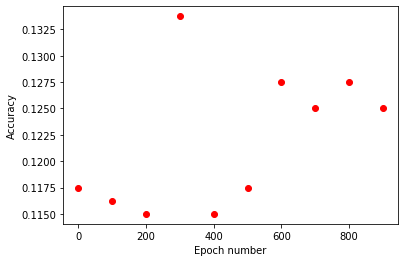

=== Result on test data ===
Accuracy: 14.499999999999998 %


In [12]:
train_data = Dataset('Music_data_set_binary_train.txt')

test_data = Dataset('Music_data_set_binary_test.txt')

nnfile = "NeuralNetParameters.dat"

mlp = MLP(nnfile, train_data, print_step=100, verbose=False)

mlp.train(1000, 0.5)
mlp.make_plot()

print("=== Result on test data ===")
mlp.setdataset(test_data)
mlp.print_accuracy()